# Linear Regression 

 If the CPU usage has a linear trend or simple patterns, linear regression can perform well. 
 When data is limited, complex models might overfit. Simple models are less prone to overfitting due to their lower complexity.
 

Linear Regression Model - MSE: 48.1371010385435, RMSE: 6.938090590252011, R²: 0.6125968906398356


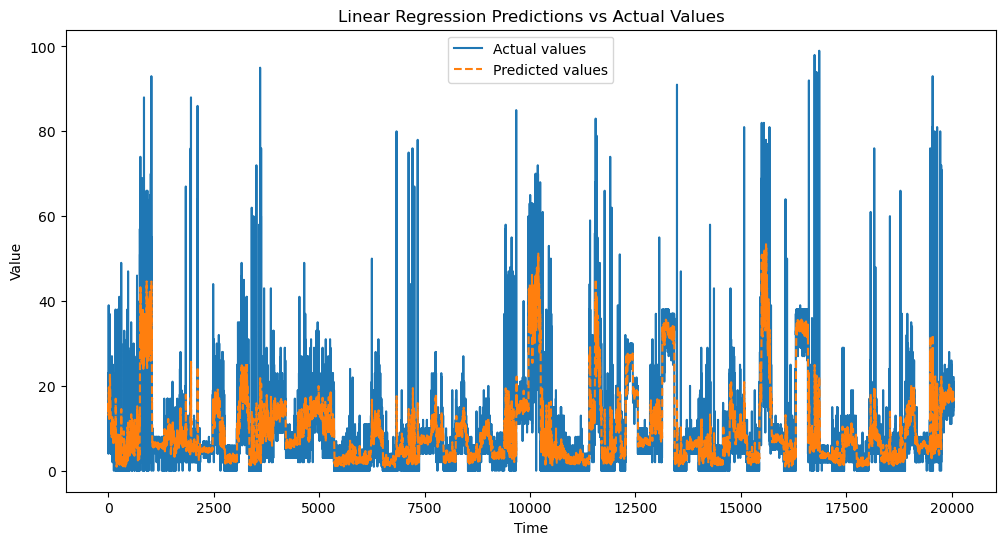

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'C:/Users/ratho/OneDrive/Desktop/dataset1.txt'
data = pd.read_csv(file_path, header=None)
cpu_usage = data.values.flatten()

# Define parameters
sequence_length = 10

# Prepare the data
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

X, y = create_sequences(cpu_usage, sequence_length)

# Flatten X for Linear Regression
X_flattened = X.reshape(-1, sequence_length)
y_flattened = y

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X_flattened)
y_scaled = scaler_y.fit_transform(y_flattened.reshape(-1, 1)).flatten()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, train_size=0.8, shuffle=False)

# Define and train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict
lr_predictions = model_lr.predict(X_test)

# Rescale predictions
lr_predictions_inv = scaler_y.inverse_transform(lr_predictions.reshape(-1, 1))
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
mse_lr = mean_squared_error(y_test_inv, lr_predictions_inv)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_inv, lr_predictions_inv)

print(f'Linear Regression Model - MSE: {mse_lr}, RMSE: {rmse_lr}, R²: {r2_lr}')

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_inv)), y_test_inv, label='Actual values')
plt.plot(range(len(lr_predictions_inv)), lr_predictions_inv, label='Predicted values', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Linear Regression Predictions vs Actual Values')
plt.legend()
plt.show()


Sometimes simpler models outperform more complex ones, particularly if the underlying data or relationships are straightforward. It’s essential to ensure that all models are properly configured, trained, and evaluated to understand their true performance.

Complex models are better suited for capturing non-linear relationships and dependencies. If CPU usage data has intricate temporal patterns or trends, they might have provide better accuracy.